## Baseline Model -- ANN

### 1. Data

In [1]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
chart_event = np.load('MV_ChartEvent_feature.npy')
lab_event = np.load('MV_LabEvent_feature.npy')

admission_type = np.load('admission type.npy')[:,1:]
gender = np.load('gender.npy')[:,1:]   
ICU_times = np.load('ICU times.npy')[:,1:]
LOS = np.load('LOS.npy')[:,1:]   

print(chart_event.shape, lab_event.shape, \
      admission_type.shape, gender.shape, ICU_times.shape, LOS.shape)

(2020, 32) (2020, 44) (2020, 3) (2020, 2) (2020, 1) (2020, 1)


In [3]:
X = np.concatenate((chart_event, lab_event, admission_type, gender, ICU_times, LOS), axis=1) 
X.shape

(2020, 83)

In [4]:
y = np.load('mortality labels.npy')[:,1].reshape(2020,1)
y.shape

(2020, 1)

In [5]:
from sklearn.model_selection import train_test_split

# 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True)

print('training data: ', X_train.shape, y_train.shape)
print('validation data: ', X_val.shape, y_val.shape)
print('testing data: ', X_test.shape, y_test.shape)

training data:  (1212, 83) (1212, 1)
validation data:  (404, 83) (404, 1)
testing data:  (404, 83) (404, 1)


### 2. Model

### 2.1 without regularization

In [11]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(128, activation='relu', input_shape=(83,)))  
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))   

network.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               10752     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 25,281
Trainable params: 25,281
Non-trainable params: 0
_________________________________________________________________


In [7]:
def fit_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=64, validation_data=(X_val, y_val))
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("Test loss: %.3f, accuracy %.3f"%(test_loss, test_acc))
    return history

In [12]:
history = fit_model(model = network, x_train = X_train, y_train =y_train, x_val = X_val, y_val = y_val, \
                    x_test = X_test, y_test = y_test)

Train on 1212 samples, validate on 404 samples
Epoch 1/50
1212/1212 [==============================] - 0s 166us/step - loss: 497.5317 - accuracy: 0.5297 - val_loss: 15.3576 - val_accuracy: 0.5446
Epoch 2/50
1212/1212 [==============================] - 0s 30us/step - loss: 304.3356 - accuracy: 0.5767 - val_loss: 16.4389 - val_accuracy: 0.6287
Epoch 3/50
1212/1212 [==============================] - 0s 35us/step - loss: 818.8851 - accuracy: 0.5553 - val_loss: 17.3231 - val_accuracy: 0.5198
Epoch 4/50
1212/1212 [==============================] - 0s 31us/step - loss: 288.0005 - accuracy: 0.5809 - val_loss: 37.7157 - val_accuracy: 0.5594
Epoch 5/50
1212/1212 [==============================] - 0s 30us/step - loss: 823.2817 - accuracy: 0.5586 - val_loss: 15.3804 - val_accuracy: 0.5272
Epoch 6/50
1212/1212 [==============================] - 0s 26us/step - loss: 1334.8154 - accuracy: 0.5446 - val_loss: 37.8181 - val_accuracy: 0.5718
Epoch 7/50
1212/1212 [==============================] - 0s 23us

### 2.2 with regularization

In [13]:
from keras import regularizers

network1 = models.Sequential()

network1.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(83,)))      
network1.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
network1.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
network1.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
network1.add(layers.Dense(1, activation='sigmoid'))  

network1.summary() 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               10752     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 25,281
Trainable params: 25,281
Non-trainable params: 0
_________________________________________________________________


In [14]:
history1 = fit_model(model = network1, x_train = X_train, y_train =y_train, x_val = X_val, y_val = y_val, \
                    x_test = X_test, y_test = y_test)

Train on 1212 samples, validate on 404 samples
Epoch 1/50
1212/1212 [==============================] - 0s 186us/step - loss: 911.2858 - accuracy: 0.5528 - val_loss: 46.1938 - val_accuracy: 0.5347
Epoch 2/50
1212/1212 [==============================] - 0s 27us/step - loss: 655.1089 - accuracy: 0.5776 - val_loss: 34.5774 - val_accuracy: 0.5124
Epoch 3/50
1212/1212 [==============================] - 0s 26us/step - loss: 302.6304 - accuracy: 0.5842 - val_loss: 11.5351 - val_accuracy: 0.6460
Epoch 4/50
1212/1212 [==============================] - 0s 25us/step - loss: 170.8033 - accuracy: 0.6477 - val_loss: 23.8924 - val_accuracy: 0.5099
Epoch 5/50
1212/1212 [==============================] - 0s 24us/step - loss: 449.3083 - accuracy: 0.5866 - val_loss: 28.4453 - val_accuracy: 0.6238
Epoch 6/50
1212/1212 [==============================] - 0s 26us/step - loss: 555.3067 - accuracy: 0.6139 - val_loss: 42.4317 - val_accuracy: 0.5198
Epoch 7/50
1212/1212 [==============================] - 0s 25us/

### 3. learning curve

### 3.1 without regularization

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

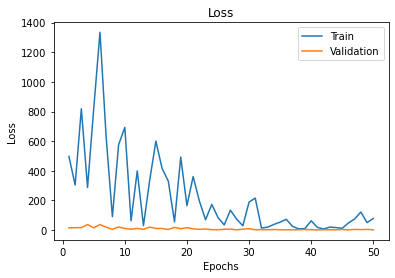

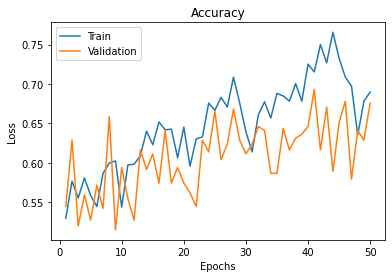

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Train')
plt.plot(epochs, history.history['val_loss'], label='Validation')

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss_before regularization.png', dpi=1200)

plt.figure()

plt.plot(epochs, history.history['accuracy'], label='Train')
plt.plot(epochs, history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Accuracy_before regularization.png', dpi=1200)

plt.show()

### 3.2 with regularization

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

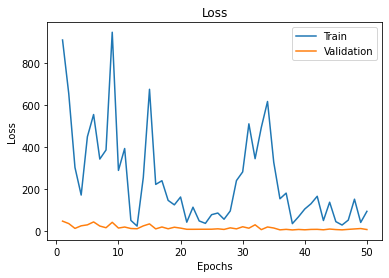

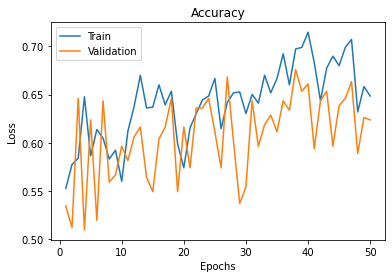

In [16]:
plt.plot(epochs, history1.history['loss'], label='Train')
plt.plot(epochs, history1.history['val_loss'], label='Validation')

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss_after regularization.png', dpi=1200)

plt.figure()

plt.plot(epochs, history1.history['accuracy'], label='Train')
plt.plot(epochs, history1.history['val_accuracy'], label='Validation')

plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Accuracy_after regularization.png', dpi=1200)
plt.show()

### 4. classification report

In [17]:
from sklearn.metrics import classification_report

y_hat_prob = network1.predict(X_test)    # use the model with regularization, without dropout
y_hat = (y_hat_prob > 0.5)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       208
           1       0.59      0.55      0.57       196

    accuracy                           0.59       404
   macro avg       0.59      0.59      0.59       404
weighted avg       0.59      0.59      0.59       404



### 5. ROC curve

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_hat_prob)
auc = roc_auc_score(y_test, y_hat_prob)

In [19]:
np.save('ANN_y_test.npy',y_test)
np.save('ANN_y_hat_prob.npy', y_hat_prob)

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

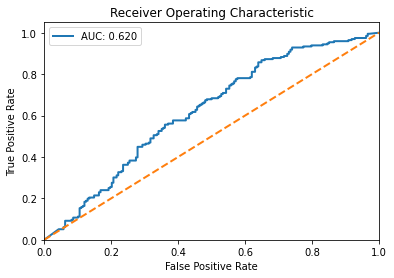

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure();
plt.plot(fpr, tpr, lw=2, label=f'AUC: {auc:.3f}');
plt.plot([0, 1], [0, 1], lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('Receiver Operating Characteristic');
plt.legend()
plt.show();
plt.savefig('ROC.png', dpi=1000)

### 6. cross validation

In [54]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(X)     # 10 folds CV

10

In [55]:
CV_train_indices = []  
CV_test_indices = []

for train_index, test_index in kf.split(X):
    CV_train_indices.append(train_index)
    CV_test_indices.append(test_index)
    
print(len(CV_train_indices))
print(len(CV_test_indices))
print(len(CV_train_indices[0]))
print(len(CV_test_indices[0]))

10
10
1818
202


In [56]:
print(X[CV_train_indices[0]].shape)   # x_train
print(y[CV_train_indices[0]].shape)   # y_train

(1818, 83)
(1818, 1)


In [57]:
def network_CV():
    
    network_CV = models.Sequential()
    network_CV.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(83,)))      
    network_CV.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    network_CV.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    network_CV.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    network_CV.add(layers.Dense(1, activation='sigmoid'))  
    
    return network_CV

In [58]:
def fit_model_CV(model, x_train, y_train, x_test, y_test):
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=50, verbose=1, batch_size=64)
    test_loss, test_acc = model.evaluate(x_test, y_test)

    return test_loss, test_acc

In [59]:
test_loss_CV = []
test_acc_CV = []

In [60]:
for i in range(kf.get_n_splits(X)):
    test_loss, test_acc = fit_model_CV(model = network_CV(), \
                                   x_train = X[CV_train_indices[i]], y_train = y[CV_train_indices[i]], \
                                   x_test = X[CV_test_indices[i]], y_test = y[CV_test_indices[i]])
    test_loss_CV.append(test_loss)
    test_acc_CV.append(test_acc)

Epoch 1/50
1818/1818 [==============================] - 0s 97us/step - loss: 99.3438 - accuracy: 0.5792
Epoch 2/50
1818/1818 [==============================] - 0s 25us/step - loss: 600.4535 - accuracy: 0.5743
Epoch 3/50
1818/1818 [==============================] - 0s 23us/step - loss: 484.0977 - accuracy: 0.5803
Epoch 4/50
1818/1818 [==============================] - 0s 21us/step - loss: 504.1504 - accuracy: 0.5831
Epoch 5/50
1818/1818 [==============================] - 0s 24us/step - loss: 260.6058 - accuracy: 0.6133
Epoch 6/50
1818/1818 [==============================] - 0s 22us/step - loss: 72.2761 - accuracy: 0.6183
Epoch 7/50
1818/1818 [==============================] - 0s 22us/step - loss: 94.8916 - accuracy: 0.6282
Epoch 8/50
1818/1818 [==============================] - 0s 20us/step - loss: 80.4129 - accuracy: 0.6232
Epoch 9/50
1818/1818 [==============================] - 0s 22us/step - loss: 40.8436 - accuracy: 0.6529
Epoch 10/50
1818/1818 [==============================] - 0s 

Epoch 28/50
1818/1818 [==============================] - 0s 21us/step - loss: 36.5209 - accuracy: 0.6612
Epoch 29/50
1818/1818 [==============================] - 0s 21us/step - loss: 144.4230 - accuracy: 0.6496
Epoch 30/50
1818/1818 [==============================] - 0s 21us/step - loss: 135.9699 - accuracy: 0.6672
Epoch 31/50
1818/1818 [==============================] - 0s 21us/step - loss: 30.3425 - accuracy: 0.6854
Epoch 32/50
1818/1818 [==============================] - 0s 20us/step - loss: 18.4008 - accuracy: 0.6953
Epoch 33/50
1818/1818 [==============================] - 0s 21us/step - loss: 39.2496 - accuracy: 0.7101
Epoch 34/50
1818/1818 [==============================] - 0s 21us/step - loss: 13.5676 - accuracy: 0.6777
Epoch 35/50
1818/1818 [==============================] - 0s 21us/step - loss: 20.2488 - accuracy: 0.6925
Epoch 36/50
1818/1818 [==============================] - 0s 21us/step - loss: 5.9770 - accuracy: 0.6997
Epoch 37/50
1818/1818 [==============================]

Epoch 30/50
1818/1818 [==============================] - 0s 20us/step - loss: 65.6734 - accuracy: 0.6447
Epoch 31/50
1818/1818 [==============================] - 0s 19us/step - loss: 50.6180 - accuracy: 0.6606
Epoch 32/50
1818/1818 [==============================] - 0s 20us/step - loss: 17.7509 - accuracy: 0.6601
Epoch 33/50
1818/1818 [==============================] - 0s 20us/step - loss: 13.2088 - accuracy: 0.6601
Epoch 34/50
1818/1818 [==============================] - 0s 20us/step - loss: 35.7317 - accuracy: 0.6639
Epoch 35/50
1818/1818 [==============================] - 0s 19us/step - loss: 34.7664 - accuracy: 0.6100
Epoch 36/50
1818/1818 [==============================] - 0s 19us/step - loss: 62.3320 - accuracy: 0.6150
Epoch 37/50
1818/1818 [==============================] - 0s 18us/step - loss: 337.5383 - accuracy: 0.6469
Epoch 38/50
1818/1818 [==============================] - 0s 20us/step - loss: 89.3455 - accuracy: 0.6128
Epoch 39/50
1818/1818 [==============================]

1818/1818 [==============================] - 0s 25us/step - loss: 89.3186 - accuracy: 0.6942
Epoch 32/50
1818/1818 [==============================] - 0s 25us/step - loss: 44.2579 - accuracy: 0.6947
Epoch 33/50
1818/1818 [==============================] - 0s 25us/step - loss: 41.2936 - accuracy: 0.6815
Epoch 34/50
1818/1818 [==============================] - 0s 24us/step - loss: 32.5492 - accuracy: 0.6672
Epoch 35/50
1818/1818 [==============================] - 0s 25us/step - loss: 37.1953 - accuracy: 0.6887
Epoch 36/50
1818/1818 [==============================] - 0s 25us/step - loss: 75.6217 - accuracy: 0.6947
Epoch 37/50
1818/1818 [==============================] - 0s 24us/step - loss: 48.8326 - accuracy: 0.6403
Epoch 38/50
1818/1818 [==============================] - 0s 25us/step - loss: 97.0223 - accuracy: 0.6370
Epoch 39/50
1818/1818 [==============================] - 0s 25us/step - loss: 121.5158 - accuracy: 0.6397
Epoch 40/50
1818/1818 [==============================] - 0s 24us/s

1818/1818 [==============================] - 0s 24us/step - loss: 369.4678 - accuracy: 0.6095
Epoch 9/50
1818/1818 [==============================] - 0s 24us/step - loss: 310.3482 - accuracy: 0.5974
Epoch 10/50
1818/1818 [==============================] - 0s 23us/step - loss: 71.4042 - accuracy: 0.6122
Epoch 11/50
1818/1818 [==============================] - 0s 25us/step - loss: 223.6008 - accuracy: 0.6359
Epoch 12/50
1818/1818 [==============================] - 0s 25us/step - loss: 204.4948 - accuracy: 0.6260
Epoch 13/50
1818/1818 [==============================] - 0s 24us/step - loss: 36.3183 - accuracy: 0.6485
Epoch 14/50
1818/1818 [==============================] - 0s 23us/step - loss: 68.7006 - accuracy: 0.6381
Epoch 15/50
1818/1818 [==============================] - 0s 24us/step - loss: 111.3267 - accuracy: 0.6265
Epoch 16/50
1818/1818 [==============================] - 0s 25us/step - loss: 111.3527 - accuracy: 0.6386
Epoch 17/50
1818/1818 [==============================] - 0s 23

In [73]:
print(len(test_loss_CV))
print(len(test_acc_CV))

print(np.mean(test_loss_CV))
print(np.var(test_loss_CV))

print(np.mean(test_acc_CV))
print(np.var(test_acc_CV))

10
10
15.799785112390424
369.6644890879434
0.6024752557277679
0.001455985252944636
